In [1]:
#项目8项目实训代码
import pandas as pd
#读取数据
names=["年龄","职业","周工作时长","性别","学历","单位性质","月薪"]
dataset=pd.read_csv('item8-sx-adult-y.csv',names=names)
print('员工基本信息数据集')
display(dataset.head(32561))

员工基本信息数据集


,年龄,职业,周工作时长,性别,学历,单位性质,月薪
0,39,Adm-clerical,40,Male,Bachelors,State-gov,<=50K
1,50,Exec-managerial,13,Male,Bachelors,Self-emp-not-inc,<=50K
2,38,Handlers-cleaners,40,Male,HS-grad,Private,<=50K
3,53,Handlers-cleaners,40,Male,11th,Private,<=50K
4,28,Prof-specialty,40,Female,Bachelors,Private,<=50K
...,...,...,...,...,...,...,...
32556,27,Tech-support,38,Female,Assoc-acdm,Private,<=50K
32557,40,Machine-op-inspct,40,Male,HS-grad,Private,>50K
32558,58,Adm-clerical,40,Female,HS-grad,Private,<=50K
32559,22,Adm-clerical,20,Male,HS-grad,Private,<=50K


In [2]:
#数据预处理
from sklearn import preprocessing
#将职业列转换为数值型数据
labels=dataset['职业'].unique().tolist()
dataset['职业']=dataset['职业'].apply(lambda x:labels.index(x)) 
#将性别列转换为数值型数据
labels=dataset['性别'].unique().tolist()
dataset['性别']=dataset['性别'].apply(lambda x:labels.index(x))
#将学历列转换为数值型数据
labels=dataset['学历'].unique().tolist()
dataset['学历']=dataset['学历'].apply(lambda x:labels.index(x))
#将单位性质列转换为数值型数据
labels=dataset['单位性质'].unique().tolist()
dataset['单位性质']=dataset['单位性质'].apply(lambda x:labels.index(x))

#对标签列“月薪”进行数值化处理
le=preprocessing.LabelEncoder()#标签编码
dataset['标签']=le.fit_transform(dataset['月薪']) #转换为数值标签
display(dataset.head(32561))

,年龄,职业,周工作时长,性别,学历,单位性质,月薪,标签
0,39,0,40,0,0,0,<=50K,0
1,50,1,13,0,0,1,<=50K,0
2,38,2,40,0,1,2,<=50K,0
3,53,2,40,0,2,2,<=50K,0
4,28,3,40,1,0,2,<=50K,0
...,...,...,...,...,...,...,...,...
32556,27,10,38,1,6,2,<=50K,0
32557,40,9,40,0,1,2,>50K,1
32558,58,0,40,1,1,2,<=50K,0
32559,22,0,20,0,1,2,<=50K,0


最大预测准确率为：0.797789
预测准确率最大的模型对应的参数值为：121


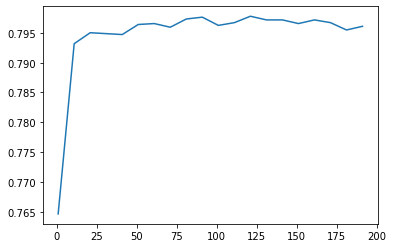

In [3]:
#调节随机森林算法的n_estimators参数，并画出对应的学习曲线
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#提取特征变量与标签值
x=dataset.iloc[range(0,32561),range(0,6)].values
y=dataset.iloc[range(0,32561),range(7,8)].values.reshape(1,32561)[0]
#拆分数据集
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)
score=[]
for i in range(0,200,10):
    model=RandomForestClassifier(random_state=0,n_estimators=i+1)
    model= model.fit(x_train,y_train)
    pred=model.predict(x_test)
    ac=accuracy_score(y_test,pred)
    score.append(ac)
print('最大预测准确率为：%f'%max(score))
n=score.index(max(score))*10+1
print('预测准确率最大的模型对应的参数值为：%.0f'%n)
plt.plot(range(1,201,10),score)
plt.show()

In [4]:
#训练与评估模型
from sklearn.metrics import classification_report

model=RandomForestClassifier(random_state=0,n_estimators=121)
model.fit(x_train,y_train)
pred=model.predict(x_test)
re=classification_report(y_test,pred)
print('模型评估报告：')
print(re)

模型评估报告：
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      5026
           1       0.57      0.48      0.52      1487

    accuracy                           0.80      6513
   macro avg       0.71      0.69      0.70      6513
weighted avg       0.79      0.80      0.79      6513



In [5]:
#预测新样本
x_new=[[40,9,40,1,2,2]] #新数据中职业为Machine-op-inspct，转换为数值型数据为9；性别为女，转换为数值型数据为1；学历为HS-grad，转换为数值型数据为2；单位性质为Private，转换为数值型数据为2
result=model.predict(x_new)
if result==1:
    print("该员工月薪应超过5万元")
else:
    print("该员工月薪不应超过5万元")

该员工月薪不应超过5万元
